In [53]:
import pandas as pd

weather = pd.read_csv(r"C:\Users\lamic\OneDrive - MSFT\Desktop\Data_Analysis\weather_data.csv")
shivaratri = pd.read_csv(r"C:\Users\lamic\OneDrive - MSFT\Desktop\Data_Analysis\shivaratri_dates.csv")

weather['DATE'] = pd.to_datetime(weather['DATE'])
shivaratri['Shivaratri Date'] = pd.to_datetime(shivaratri['Shivaratri Date'])

In [54]:
districts = ['Kathmandu', 'Bhaktapur', 'Lalitpur']
weather = weather[weather['DISTRICT'].isin(districts)]

In [55]:
weather['PRECTOT'] = weather['PRECTOT'].fillna(0)

In [56]:
shivaratri['Year'] = shivaratri['Shivaratri Date'].dt.year

In [57]:
weather['Year'] = weather['DATE'].dt.year


In [58]:
merged = pd.merge(
    weather,
    shivaratri,
    on='Year',  # Merge on year only
    how='left'  # Keep all weather data
)

In [59]:
# Keep only rows where the DATE is Shivaratri Date
merged = merged[merged['DATE'] == merged['Shivaratri Date']]

In [60]:
districts = ['Kathmandu', 'Bhaktapur', 'Lalitpur']
merged = merged[merged['DISTRICT'].isin(districts)]

In [61]:
merged['Rained'] = (merged['PRECTOT'] > 0).astype(int)
summary = merged.groupby(['Year', 'DISTRICT'])['Rained'].max().unstack()

print(summary)

DISTRICT  Bhaktapur  Kathmandu  Lalitpur
Year                                    
1981              0          0         0
1982              1          1         1
1983              0          0         0
1984              0          0         0
1985              1          1         1
1986              0          0         0
1987              1          1         1
1988              0          0         0
1989              0          0         0
1990              0          0         0
1991              1          1         1
1992              0          0         0
1993              0          0         0
1994              0          0         0
1995              1          1         1
1996              0          0         0
1997              0          0         0
1998              1          1         1
1999              0          0         0
2000              0          0         0
2001              1          1         1
2002              0          0         0
2003            

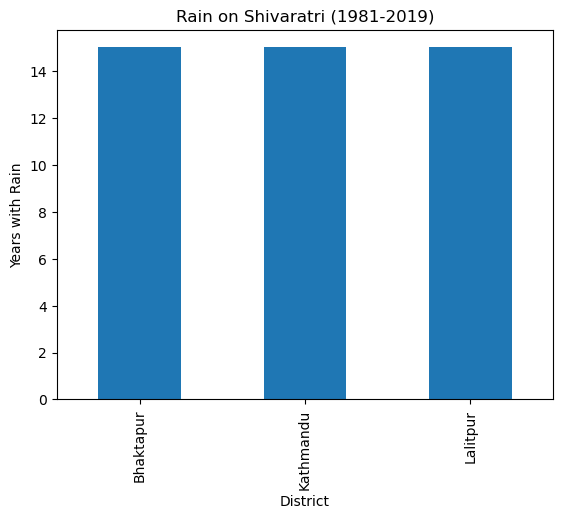

In [62]:
import pandas as pd
import matplotlib.pyplot as plt  # <-- Add this line

# Your data loading, cleaning, and merging steps here...

# Plotting
summary.sum().plot(kind='bar', title='Rain on Shivaratri (1981-2019)')
plt.xlabel('District')
plt.ylabel('Years with Rain')
plt.show()

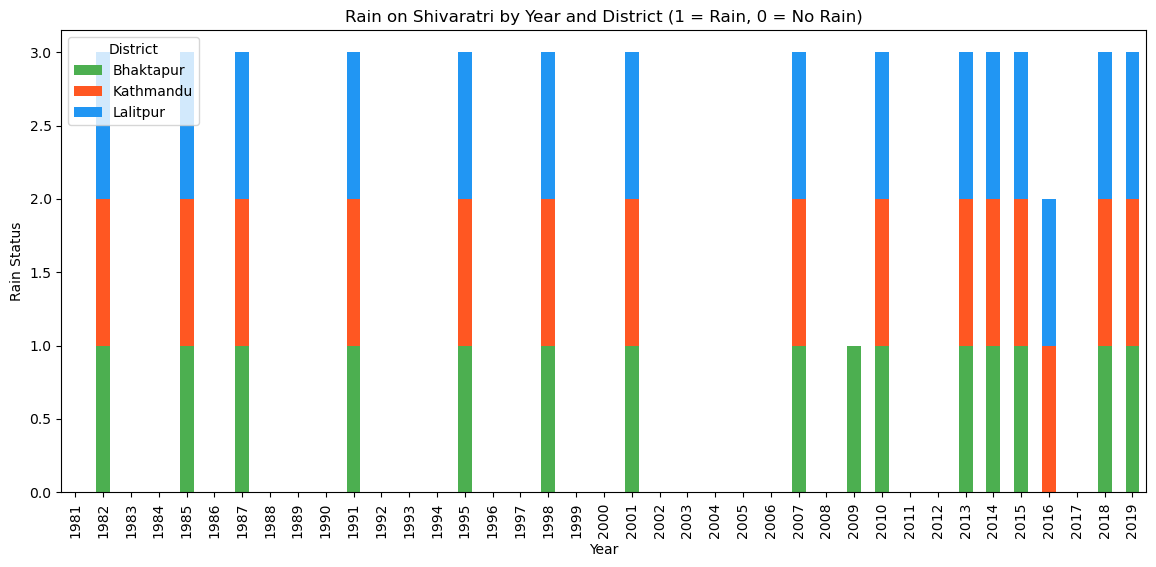

In [63]:
summary.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF5722', '#2196F3'], figsize=(14, 6))
plt.title("Rain on Shivaratri by Year and District (1 = Rain, 0 = No Rain)")
plt.xlabel("Year")
plt.ylabel("Rain Status")
plt.legend(title='District')
plt.show()

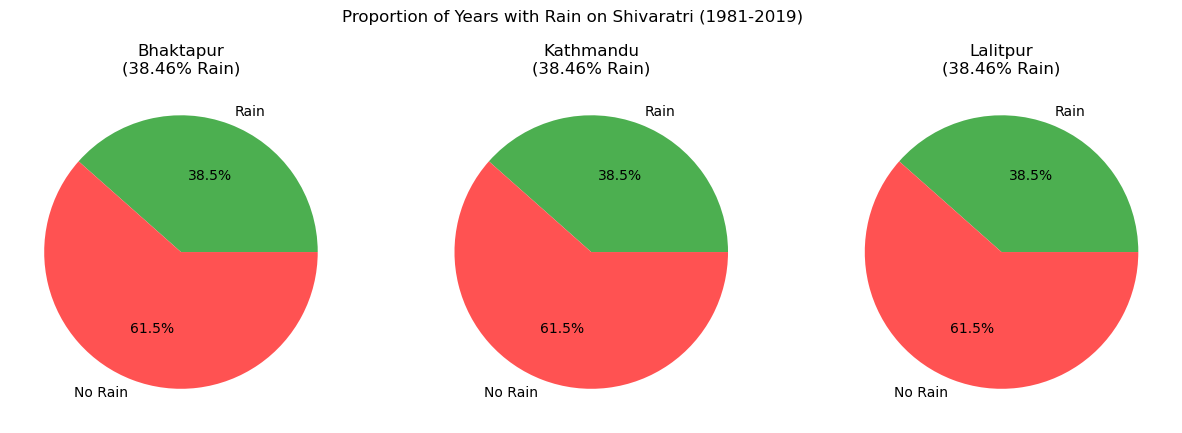

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, district in enumerate(summary.columns):
    rain_percent = (summary[district].mean() * 100).round(2)
    axes[i].pie(
        [rain_percent, 100 - rain_percent],
        labels=['Rain', 'No Rain'],
        autopct='%1.1f%%',
        colors=['#4CAF50', '#FF5252']
    )
    axes[i].set_title(f"{district}\n({rain_percent}% Rain)")

plt.suptitle("Proportion of Years with Rain on Shivaratri (1981-2019)")
plt.show()

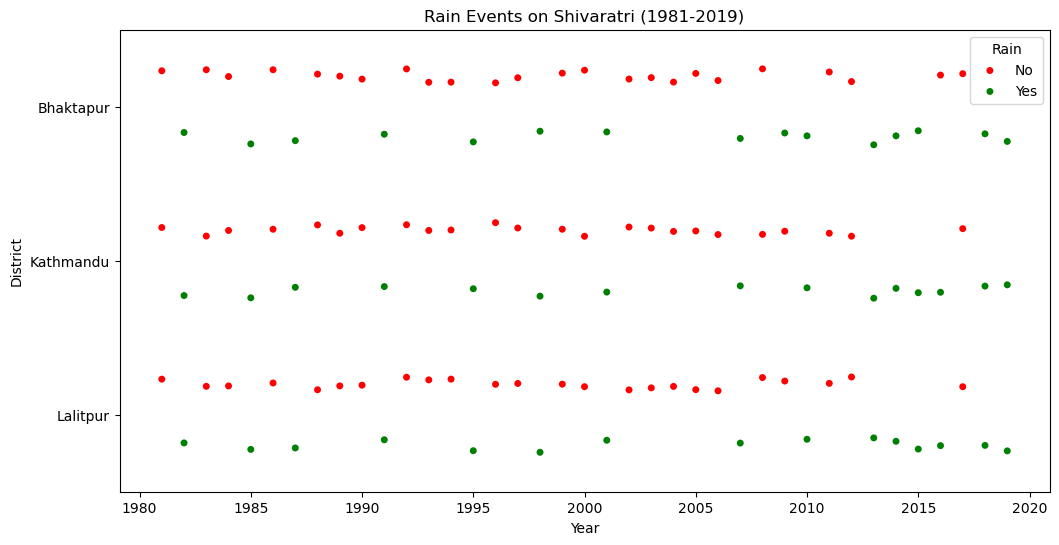

In [65]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='Year',
    y='DISTRICT',
    hue='Rained',
    data=merged,
    dodge=True,
    palette={0: 'red', 1: 'green'},
    jitter=True
)
plt.title("Rain Events on Shivaratri (1981-2019)")
plt.xlabel("Year")
plt.ylabel("District")
plt.legend(title='Rain', labels=['No', 'Yes'])
plt.show()

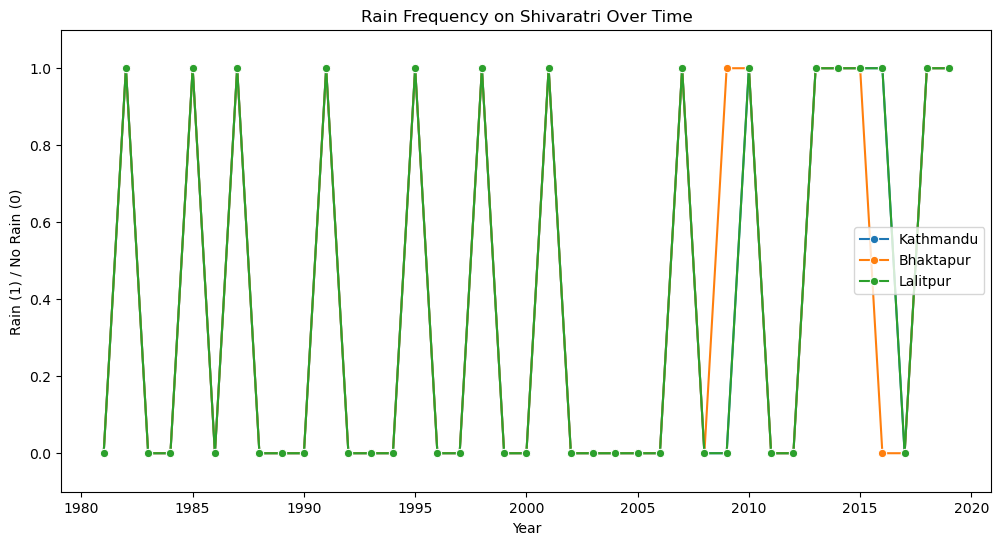

In [66]:
plt.figure(figsize=(12, 6))
for district in districts:
    sns.lineplot(
        data=summary[district].reset_index(),
        x='Year',
        y=district,
        marker='o',
        label=district
    )
plt.title("Rain Frequency on Shivaratri Over Time")
plt.ylabel("Rain (1) / No Rain (0)")
plt.ylim(-0.1, 1.1)
plt.show()

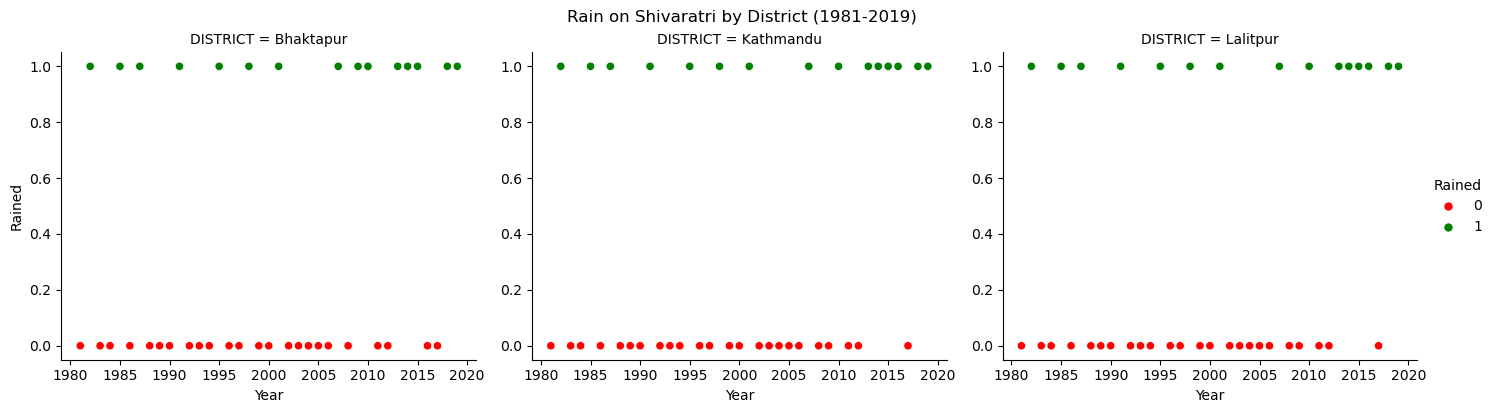

In [67]:
sns.relplot(
    data=merged,
    x='Year',
    y='Rained',
    hue='Rained',
    col='DISTRICT',
    kind='scatter',
    palette={0: 'red', 1: 'green'},
    height=4,
    aspect=1.2,
    facet_kws={'sharey': False, 'sharex': True}
)
plt.suptitle("Rain on Shivaratri by District (1981-2019)", y=1.02)
plt.show()